In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
fp0 = "F:\\EUparlData\\allRowsMinusText.csv"
fp1 = "F:\\EUparlData\\plots"

fpc = os.path.join(fp1, 'perCountry')
fpg = os.path.join(fp1, 'perPolGroup')
fpp = os.path.join(fp1, 'byPartyPerCountry')

In [3]:
DF = pd.read_csv(fp0)
DF = DF.iloc[234209:]

C:\Users\Asus\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
DF

,id,speechNumber,speechTime,speechLanguage,speakerName,speakerType,speakerID,speakerCountry,speakerPolGroup,speakerParty,health,climate,intersection
234209,234209,1-013-0000,"('2020-02-10T17:10:43.649', '2020-02-10T17:11:...",FR,Manon Aubry,NaN,197533.0,France,The Left group in the European Parliament - GU...,La France Insoumise,0,0,0
234210,234210,1-014-0000,"('2020-02-10T17:11:53.908', '2020-02-10T17:12:...",EN,Mairead McGuinness,NaN,28115.0,NaN,NaN,NaN,0,0,0
234211,234211,1-015-0000,"('2020-02-10T17:12:11.215', '2020-02-10T17:12:...",PT,Sandra Pereira,NaN,197754.0,Portugal,The Left group in the European Parliament - GU...,Partido Comunista Português,0,0,0
234212,234212,1-016-0000,"('2020-02-10T17:12:54.158', '2020-02-10T17:13:...",EN,Mairead McGuinness,NaN,28115.0,NaN,NaN,NaN,0,0,0
234213,234213,1-020-0000,"('2020-02-10T17:13:19.011', '2020-02-10T17:13:...",EN,Mairead McGuinness,NaN,28115.0,NaN,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
253833,253833,4-166-0000,"('2021-12-16T15:38:18.463', '2021-12-16T15:39:...",NL,Tom Vandenkendelaere,NaN,129164.0,Belgium,Group of the European People's Party (Christia...,Christen-Democratisch and Vlaams,0,0,0
253834,253834,4-167-0000,"('2021-12-16T15:39:42.852', '2021-12-16T15:45:...",EN,Adina-Ioana Vălean,membre de la commission,0.0,NaN,NaN,NaN,1,0,0
253835,253835,4-168-0000,"('2021-12-16T15:45:53.300', '2021-12-16T15:46:...",DE,Rainer Wieland,NaN,2323.0,Germany,Group of the European People's Party (Christia...,Christlich Demokratische Union Deutschlands,0,0,0
253836,253836,4-184-0000,"('2021-12-16T16:02:32.662', '2021-12-16T16:02:...",DE,Rainer Wieland,NaN,2323.0,Germany,Group of the European People's Party (Christia...,Christlich Demokratische Union Deutschlands,0,0,0


In [5]:
DF = DF.dropna(subset = ['speakerCountry'])
DF = DF.dropna(subset = ['speakerPolGroup'])

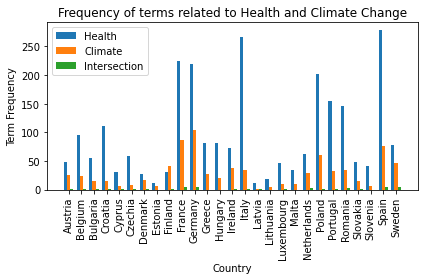

In [44]:
####Country

DFc = DF[['speakerCountry', 'health', 'climate', 'intersection']]
DFc = DFc.groupby(by = 'speakerCountry', as_index = False).sum()

x = np.arange(len(DFc))  # the label locations
width = 0.25 # the width of the bars

fig, ax = plt.subplots()
rects0 = ax.bar(x - width, DFc['health'], width, label='Health')
rects1 = ax.bar(x , DFc['climate'], width, label='Climate')
rects2 = ax.bar(x + width, DFc['intersection'], width, label='Intersection')


ax.set_ylabel('Term Frequency')
ax.set_xlabel('Country')
ax.set_title('Frequency of terms related to Health and Climate Change')
ax.set_xticks(x)

plt.plot()
ax.set_xticklabels(DFc['speakerCountry'], rotation=90)
ax.legend()

fig.tight_layout()

#plt.show()
plt.savefig(os.path.join(fp1, 'byCountry.png'), format = 'png', dpi=600)

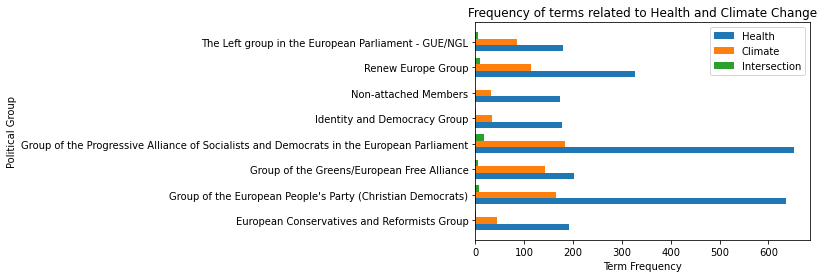

In [71]:
####Political Group

DFc = DF[['speakerPolGroup', 'health', 'climate', 'intersection']]
DFc = DFc.groupby(by = 'speakerPolGroup', as_index = False).sum()

x = np.arange(len(DFc))  # the label locations
width = 0.25 # the width of the bars

fig, ax = plt.subplots()
rects0 = ax.barh(x - width, DFc['health'], width, label='Health')
rects1 = ax.barh(x , DFc['climate'], width, label='Climate')
rects2 = ax.barh(x + width, DFc['intersection'], width, label='Intersection')

ax.set_xlabel('Term Frequency')
ax.set_ylabel('Political Group')
ax.set_title('Frequency of terms related to Health and Climate Change')
ax.set_yticks(x)

plt.plot()
ax.set_yticklabels(DFc['speakerPolGroup'])
ax.legend()

#plt.show()

plt.savefig(os.path.join(fp1, 'byPolGroup.png'), format = 'png', dpi=600, bbox_inches="tight")

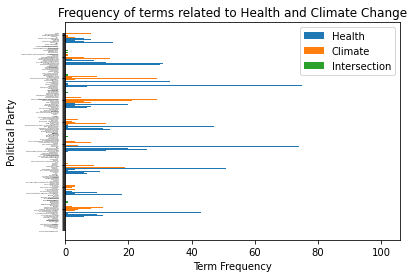

In [78]:
####Political Party

DFc = DF[['speakerParty', 'health', 'climate', 'intersection']]
DFc = DFc.groupby(by = 'speakerParty', as_index = False).sum()

x = np.arange(len(DFc))  # the label locations
width = 0.25 # the width of the bars

fig, ax = plt.subplots()
rects0 = ax.barh(x - width, DFc['health'], width, label='Health')
rects1 = ax.barh(x , DFc['climate'], width, label='Climate')
rects2 = ax.barh(x + width, DFc['intersection'], width, label='Intersection')

ax.set_xlabel('Term Frequency')
ax.set_ylabel('Political Party')
ax.set_title('Frequency of terms related to Health and Climate Change')
ax.set_yticks(x)

plt.plot()
ax.set_yticklabels(DFc['speakerParty'], fontsize = 1)
ax.legend()

#fig.tight_layout()
#plt.subplots_adjust(left=0, right = 2)
#plt.show()
plt.savefig(os.path.join(fp1, 'byParty.png'), format = 'png', dpi=1200, bbox_inches="tight")

In [6]:
countries = []
for i,row in DF.iterrows():
    r = row.to_dict()
    if r['speakerCountry'] not in countries:
        countries.append(r['speakerCountry'])
groups = []
for i,row in DF.iterrows():
    r = row.to_dict()
    if r['speakerPolGroup'] not in groups:
        groups.append(r['speakerPolGroup'])


In [8]:
yearsmd = []
for i,row in DF.iterrows():
    r = str(row.to_dict()['speechTime'])
    if r[0] == '(':
        yearsmd.append(r[2:12])
    else:
        yearsmd.append(r[0:7])
DF['yearMonthDay'] = yearsmd
#DF = DF.iloc[234209:]
#DF.insert(loc = 3,column = 'year', value = years)

In [12]:
for country in countries:
    mask = DF['speakerCountry'].values == country
    df1 = DF[mask]
    df2 = df1.groupby(['yearMonthDay'], as_index = False).sum()
    df2 = df2.dropna(subset = ['yearMonthDay'])
    df2 = df2[df2.yearMonthDay != 'nan']
    df2 = df2[df2.yearMonthDay != None]
    
    plt.plot('yearMonthDay', 'health', data = df2, label = 'Health')
    plt.plot('yearMonthDay', 'climate', data = df2, label = 'Climate')
    plt.plot('yearMonthDay', 'intersection', data = df2, label = 'Intersection')
    
    plt.xlabel('session')
    plt.ylabel('term incidence')
    plt.title(country)
    plt.grid()
    plt.legend()
    plt.xticks(rotation=45, fontsize=2)
    #plt.show()
    plt.savefig(os.path.join(fpc, country+'.png'), format = 'png', dpi=900, bbox_inches="tight")
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [73]:
for group in groups:
    mask = DF['speakerPolGroup'].values == group
    df1 = DF[mask]
    df2 = df1.groupby(['yearMonth'], as_index = False).sum()
    df2 = df2.dropna(subset = ['yearMonth'])
    df2 = df2[df2.yearMonth != 'nan']
    df2 = df2[df2.yearMonth != None]
    
    plt.plot('yearMonth', 'health', data = df2, label = 'Health')
    plt.plot('yearMonth', 'climate', data = df2, label = 'Climate')
    plt.plot('yearMonth', 'intersection', data = df2, label = 'Intersection')
    
    plt.xlabel('year-month')
    plt.ylabel('term incidence')
    plt.title(group)
    
    plt.legend()
    plt.xticks(rotation=45)
    #plt.show()
    s = ''.join(ch for ch in group if ch.isalnum())
    plt.savefig(os.path.join(fpg, s+'.png'), format = 'png', dpi=600, bbox_inches="tight")
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [104]:
for country in countries:
    print(country)
    mask = DF['speakerCountry'].values == country
    DF1 = DF[mask]
    DFc = DF1[['speakerParty', 'health', 'climate', 'intersection']]
    DFc = DFc.groupby(by = 'speakerParty', as_index = False).sum()
    
    x = np.arange(len(DFc))  # the label locations
    width = 0.25 # the width of the bars

    fig, ax = plt.subplots()
    rects0 = ax.barh(x - width, DFc['health'], width, label='Health')
    rects1 = ax.barh(x , DFc['climate'], width, label='Climate')
    rects2 = ax.barh(x + width, DFc['intersection'], width, label='Intersection')




    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Term Frequency')
    ax.set_ylabel('Political Party')
    ax.set_title('Frequency of terms related to Health and Climate Change')
    ax.set_yticks(x)

    plt.plot()
    ax.set_yticklabels(DFc['speakerParty'], fontsize = 6)
    ax.legend()
   
    

    plt.savefig(os.path.join(fpp, country+'.png'), format = 'png', dpi=900, bbox_inches="tight")
    plt.clf()

France
Portugal
Spain
Germany
Belgium
Poland
Netherlands
Luxembourg
Italy
Finland
Slovakia
Czechia
Austria
Greece
Lithuania
Romania
Ireland
Malta
Hungary
Croatia
Bulgaria


C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


Sweden
Denmark
Slovenia
Cyprus
Latvia
Estonia


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>